# GRIP: The Sparks Foundation
# Data Science and Business Analytics Internship
# Author: Harsh Yadav
# Task 1: Prediction Using Supervised Machine Learning

In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

# Importing the dataset

In [19]:
# Importing all libraries required in this notebook
# Importing all the required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 

In [20]:
# Reading data from remote link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)

#Now let's observe the data
df.head()   #It will show the first 5 rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
df.tail()   #It will show the last 5 rows of the dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [22]:
df.shape   #It will show the number of rows and columns

(25, 2)

In [23]:
df.info()  #for further information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualizing the dataset

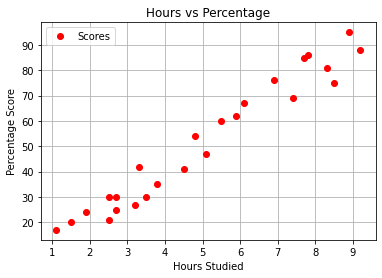

In [84]:
#Plotting the dataset
df.plot(x='Hours', y='Scores', style='o', color='red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

#### From the graph, we can observe that there is a linear relationship between 'hours studied' and 'percentage score'.

# Preparing the data

In this step we will divide the data into "attributes" (inputs) and "labels" (outputs).

In [31]:
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

#### Now we will split the data into training and testing data.

In [36]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training the Algorithm

Now as we have splitted data into traning and testing data sets so now we will train the data.

In [38]:
from sklearn.linear_model import LinearRegression  

reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression()

# Visualizing the model

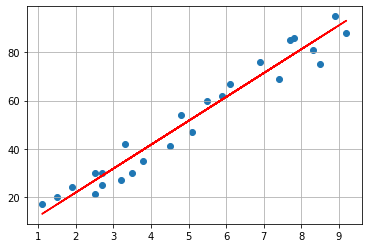

In [83]:
#Plot of regression line
line = reg.coef_*X + reg.intercept_

#Plot of test data
plt.scatter(X, y)
plt.plot(X, line , color = 'red');
plt.grid()
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions

In [64]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [70]:
b = y_pred.ravel()

In [73]:
d = y_test.ravel()

In [75]:
# Comparing Actual vs Predicted
actual_predicted = pd.DataFrame({'Actual': d, 'Predicted': b})  
actual_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [79]:
hours = 9.25
own_pred = reg.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


# Evaluating the model

In the last step, we are going to evaluate our trained model by calculating mean absolute error

In [80]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
